<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="30%" />

<hr style="height:2px;border:none"/>
<h1 align='center'> INF-395/477 Redes Neuronales Artificiales I-2020 </h1>

<H3 align='center'> Tarea 1 - Redes Neuronales y *Deep Learning* </H3>
<hr style="height:2px;border:none"/>

**Temas**  

* Arquitectura Básica de Redes Neuronales. Redes *Feed-Forward*
* Entrenamiento de Redes Neuronales. 
* Redes Convolucionales. 

**Formalidades**  
* Equipos de trabajo de: 3 personas (*cada uno debe estar en condiciones de realizar una presentación y discutir sobre cada punto del trabajo realizado*)
* Formato de entrega: envı́o de link Github y link de video Youtube o plataforma a convenir, todo esto vía Aula. 

<hr style="height:2px;border:none"/>

### **Propuesta**
* Se debe preparar una presentación de **15 a 20 minutos** donde se explique el cómo se va a realizar/resolver el taller, la metodología o propuesta de las componentes a experimentar y explorar. Más detalles en el Syllabus.
* Fecha de encuentro Zoom: 8 de Mayo en horario de clases.
* Fecha de entrega de vídeo: Opcional para quienes presentaron y obligatorio para quienes no, a lo más 2 días después del encuentro.
* Modalidad de Presentación (Zoom): En el primer bloque, se formarán 3 grupos para que alcancen a recibir feedback todos los equipos. En el segundo bloque, algunos equipos seleccionados presentarán a todo el curso. 

**Aún si la idea es aprender colaborativamente, valoraremos mucho la diversidad de ideas, por lo que las propuesta debiesen conservar su orientación inicial, excepto por el feedback que les entreguemos**

### **Defensa**
* Se debe preparar una presentación de **15 a 20 minutos** con los resultados obtenidos y conclusiones de la experiencia. 
* Se debe entregar el código, de preferencia en un (breve) Jupyter/IPython notebook, de modo que **permita reproducir los resultados** presentados. Si se entrega el código fuente se deben proveer instrucciones para su uso.
* Fecha de encuentro Zoom: 29 de Mayo, horario de clases.
* Fecha de entrega de vídeo: 27 de Mayo (2 días antes de encuentro).
* Fecha de entrega de Jypter (notebook): 27 de Mayo (commits hasta el 29 de Mayo en horario de clases). 
* Modalidad de Presentación (Zoom): En ambos bloques algunos equipos seleccionados presentarán ante todo el curso, discusión y debate se generará en base a los resultados.

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Pregunta Libre   
[2.](#segundo) Challenge Kaggle


#### <a id="primero"></a>
## 1. Pregunta Libre

Refute o evidencie experimentalmente una de las siguientes afirmaciones 


> **2. Teorema de approx. universal**: Una arquitectura de red neuronal tiene la capacidad de aproximar cualquier función y esto es independiente del número de neuronas o capas.


## a) Una arquitectura de red neuronal tiene la capacidad de aproximar cualquier función

In [2]:
import io
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np

%matplotlib inline


Using TensorFlow backend.
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

### Ejemplo de función continua

In [2]:
def ANN_regresion(X, y, input_dim,neurons=2, layers=1, activation='relu', epochs=25, batch_size=128,verbose=0):
    model = Sequential()
    model.add(Dense(units=neurons, input_dim=input_dim, activation='relu'))
    for i in range(layers-1):
        model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1))
    model.compile(optimizer=SGD(lr=0.1), loss='mse')
    model.fit(X, y, epochs=epochs, batch_size=batch_size, verbose=0)
    return model

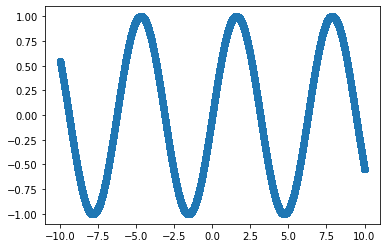

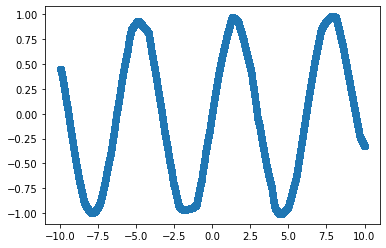

Mean Squared Error: 0.0074106824641030945


In [3]:
# Continuous function
f_c = lambda x: np.sin(x)
f_c = np.vectorize(f_c)

x_c = np.random.uniform(low=-10, high=10, size=(100000,))[:,np.newaxis]
y_c = f_c(x_c)

# transform to [0~1] scale
scale_x = MinMaxScaler()
x_c = scale_x.fit_transform(x_c)
scale_y = MinMaxScaler()
y_c = scale_y.fit_transform(y_c)

neurons = 10
layers = 10
act_function = 'relu'

model = ANN_regresion(x_c, y_c, 1,
                      neurons=neurons,
                      layers=layers,
                      activation=act_function,
                      epochs=25,
                      batch_size=128,
                      verbose=0)
#  Predict Train Data
y_c_hat = model.predict(x_c)

# Transform to real scale
x_c = scale_x.inverse_transform(x_c)
y_c = scale_y.inverse_transform(y_c)
y_c_hat = scale_y.inverse_transform(y_c_hat)

# Plot functions
plt.scatter(x_c, y_c)
plt.show()
plt.scatter(x_c, y_c_hat)
plt.show()

print(f'Mean Squared Error: {mean_squared_error(y_c, y_c_hat)}')

Podemos apreciar que efectivamente se puede aprender una función continua con cierto número de capas y neuronas.

### Ejemplo de función discontinua

(200000, 1)


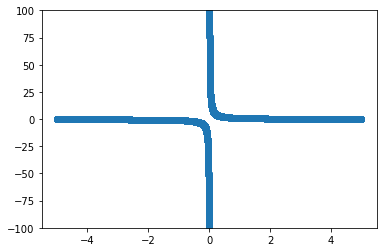

Mean Squared Error3285.011233239348


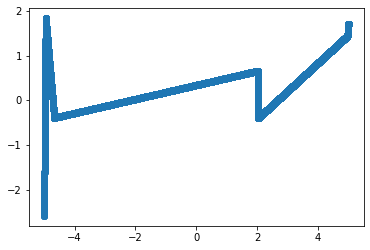

In [4]:
# Discontinuous function
# f_d = lambda x: x**2 if x <0 else 40 + 10*x
f_d = lambda x: 1 /(x)
f_d = np.vectorize(f_d)
x_d_1 = np.random.uniform(low=-5, high=-1e-17, size=(100000,))[:,np.newaxis]
x_d_2 = np.random.uniform(low=1e-17, high=5, size=(100000,))[:,np.newaxis]
x_d = np.concatenate((x_d_1, x_d_2), axis = 0)
print(x_d.shape)
y_d = f_d(x_d)

# transform to [0~1] scale
scale_x = MinMaxScaler()
x_d = scale_x.fit_transform(x_d)
scale_y = MinMaxScaler()
y_d = scale_y.fit_transform(y_d)

neurons = 10
layers = 10
act_function='relu'

model = ANN_regresion(x_d, y_d, 1,
                      neurons=neurons,
                      layers=layers,
                      activation=act_function,
                      epochs=25,
                      batch_size=128,
                      verbose=0)
# Predict Train Data
y_d_hat = model.predict(x_d)

# Transform to real scale
x_d = scale_x.inverse_transform(x_d)
y_d = scale_y.inverse_transform(y_d)
y_d_hat = scale_y.inverse_transform(y_d_hat)

# Plot functions
plt.scatter(x_d, y_d)
plt.ylim(-100,100)
plt.show()
plt.scatter(x_d, y_d_hat)
print(f'Mean Squared Error{mean_squared_error(y_d, y_d_hat)}')
plt.show()

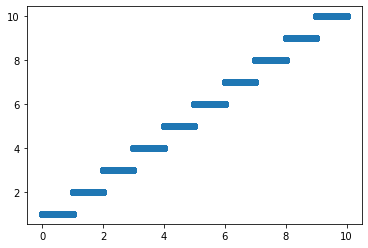

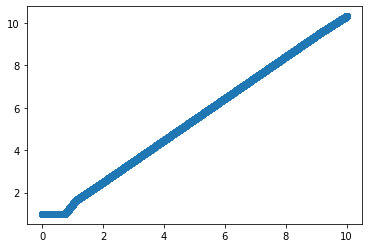

In [5]:
import math

math.ceil(0.1)
f_ceil = lambda x: math.ceil(x)
f_ceil = np.vectorize(f_ceil)
x = np.random.uniform(low=0, high=10, size=(100000,))[:,np.newaxis]
y = f_ceil(x)

scale_x = MinMaxScaler()
x = scale_x.fit_transform(x)
scale_y = MinMaxScaler()
y = scale_y.fit_transform(y)

neurons = 10
layers = 10
act_function='relu'

model = ANN_regresion(x, y, 1,
                      neurons=neurons,
                      layers=layers,
                      activation=act_function,
                      epochs=25,
                      batch_size=128,
                      verbose=0)
# Predict Train Data
y_hat = model.predict(x)

# Transform to real scale
x = scale_x.inverse_transform(x)
y = scale_y.inverse_transform(y)
y_hat = scale_y.inverse_transform(y_hat)


plt.scatter(x,y)
plt.show()
plt.scatter(x,y_hat)
plt.show()

## b) esto es independiente del número de neuronas o capas.

## XOR Example

In [6]:
def ANN_regresion_nN(X, y, input_dim, neurons=2, layers=1, activation='relu', epochs=10, batch_size=100, verbose=2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    scaler = MinMaxScaler((-1,1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = Sequential()
    neurons = int(np.round(neurons/layers)) if neurons > 1 else 1
    model.add(Dense(units=neurons, input_dim=input_dim, activation='relu'))
    for i in range(layers-1):
        model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    y_pred = model.predict(X_test, batch_size = batch_size)
    y_pred = (y_pred > 0.5)
    
    y_hat = model.predict(x)
    print(model.evaluate(x, y, verbose=0)[1])   
    del model 
    return y_pred, y_test

def ANN_regresion_nlayer(X, y, input_dim, layers, neurons=2 , activation='relu', epochs=10, batch_size=100, verbose=2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    scaler = MinMaxScaler((-1,1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = Sequential()
    model.add(Dense(units=neurons, input_dim=input_dim, activation='relu'))
    for i in range(layers-1):
        model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    y_pred = model.predict(X_test, batch_size = batch_size)
    y_pred = (y_pred > 0.5)
    
    y_hat = model.predict(x)
    
    print(model.evaluate(x, y, verbose=0)[1])
    del model
    return y_pred, y_test

In [7]:
size_train = 100000

# Create pair of numbers (a, b)
a = np.random.randint(0,2,size_train)[:,np.newaxis]
b = np.random.randint(0,2,size_train)[:,np.newaxis]
# Label of xor, between a and b 
y = np.logical_xor(a, b).astype(int)
x = np.concatenate([a,b], axis=1)
print(f'matrix size of train set {x.shape}\n')

matrix size of train set (100000, 2)



In [8]:
y_pred_list_1layer_XOR = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(x, y, x.shape[1], layers=1, neurons=i , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_1layer_XOR.append(score)
 

1
Epoch 1/10
80000/80000 [==============================] - 2s 21us/step - loss: 0.6933 - accuracy: 0.4885
Epoch 2/10
80000/80000 [==============================] - 2s 21us/step - loss: 0.6932 - accuracy: 0.4997
Epoch 3/10
80000/80000 [==============================] - 2s 20us/step - loss: 0.6932 - accuracy: 0.5008
Epoch 4/10
80000/80000 [==============================] - 2s 20us/step - loss: 0.6932 - accuracy: 0.4984
Epoch 5/10
80000/80000 [==============================] - 2s 20us/step - loss: 0.6932 - accuracy: 0.5010
Epoch 6/10
80000/80000 [==============================] - 2s 20us/step - loss: 0.6932 - accuracy: 0.4970
Epoch 7/10
80000/80000 [==============================] - 2s 21us/step - loss: 0.6932 - accuracy: 0.5011
Epoch 8/10
80000/80000 [==============================] - 2s 20us/step - loss: 0.6932 - accuracy: 0.4982
Epoch 9/10
80000/80000 [==============================] - 2s 20us/step - loss: 0.6932 - accuracy: 0.5008
Epoch 10/10
80000/80000 [============================

In [9]:
y_pred_list_nNeuron_XOR = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nN(x, y, x.shape[1], layers=i, neurons=14 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nNeuron_XOR.append(score)

1
Epoch 1/10
80000/80000 [==============================] - 2s 20us/step - loss: 0.5758 - accuracy: 0.7407
Epoch 2/10
80000/80000 [==============================] - 2s 19us/step - loss: 0.2112 - accuracy: 1.0000
Epoch 3/10
80000/80000 [==============================] - 2s 19us/step - loss: 0.0800 - accuracy: 1.0000
Epoch 4/10
80000/80000 [==============================] - 2s 19us/step - loss: 0.0422 - accuracy: 1.0000
Epoch 5/10
80000/80000 [==============================] - 2s 19us/step - loss: 0.0252 - accuracy: 1.0000
Epoch 6/10
80000/80000 [==============================] - 2s 19us/step - loss: 0.0161 - accuracy: 1.0000
Epoch 7/10
80000/80000 [==============================] - 2s 19us/step - loss: 0.0107 - accuracy: 1.0000
Epoch 8/10
80000/80000 [==============================] - 2s 20us/step - loss: 0.0073 - accuracy: 1.0000
Epoch 9/10
80000/80000 [==============================] - 2s 19us/step - loss: 0.0050 - accuracy: 1.0000
Epoch 10/10
80000/80000 [============================

In [10]:
y_pred_list_nlayer_XOR = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(x, y, x.shape[1], layers=i, neurons=14 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nlayer_XOR.append(score)

1
Epoch 1/10
80000/80000 [==============================] - 2s 20us/step - loss: 0.3849 - accuracy: 0.9907
Epoch 2/10
80000/80000 [==============================] - 2s 19us/step - loss: 0.0821 - accuracy: 1.0000
Epoch 3/10
80000/80000 [==============================] - 2s 19us/step - loss: 0.0217 - accuracy: 1.0000
Epoch 4/10
80000/80000 [==============================] - 2s 20us/step - loss: 0.0083 - accuracy: 1.0000
Epoch 5/10
80000/80000 [==============================] - 2s 21us/step - loss: 0.0039 - accuracy: 1.0000
Epoch 6/10
80000/80000 [==============================] - 2s 20us/step - loss: 0.0021 - accuracy: 1.0000
Epoch 7/10
80000/80000 [==============================] - 2s 20us/step - loss: 0.0012 - accuracy: 1.0000
Epoch 8/10
80000/80000 [==============================] - 2s 20us/step - loss: 6.7721e-04 - accuracy: 1.0000
Epoch 9/10
80000/80000 [==============================] - 2s 20us/step - loss: 4.0657e-04 - accuracy: 1.0000
Epoch 10/10
80000/80000 [====================

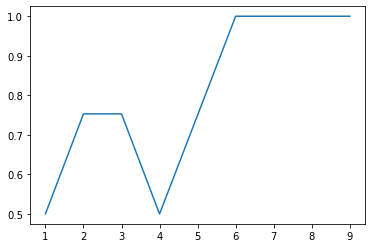

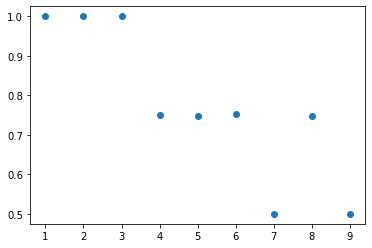

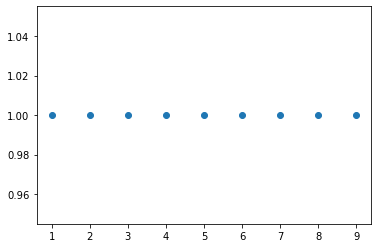

In [11]:
# Plot functions y_pred_list_1layer
plt.plot(range(1,10), y_pred_list_1layer_XOR)
plt.show()
# Plot functions y_pred_list_nNeuron
plt.plot(range(1,10), y_pred_list_nNeuron_XOR)
plt.show()
# Plot functions
plt.plot(range(1,10), y_pred_list_nlayer_XOR)
plt.show()

Los gráficos demuestran que el xor depende del número de neuronas para que sea aprendible, dado que en el gráfico 1 al usar una neurona, el reproducir la función exacta es como lanzar una moneda, y al aumentar las neuronas el accuracy aumenta, luego podemos notar que al aumentar las capas (gráfico 2) e ir dividiendolas según la capa $Capa_{Neuronas} = \frac{Neurona_{totales}}{n° capa_{actual}}$. vemos el proceso inverso, cuándo es una sola capa se tienen 10 neurona, cuando son dos se tienen 5 en cada una y en la útlitma serían 1 en cada una por lo que el xor no se aprende. Finalmente del gráfico 3 se ve que al tener 10 neuronas en el modelo y variar las capas, el problema se aprende.

Por lo tanto el xor depende del número de neuronas.

## Primer Dataset

In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.backend import clear_session

In [13]:
import pandas as pd

df = pd.read_csv('high_diamond_ranked_10min.csv')
df = df.drop(['gameId','blueWardsDestroyed','blueFirstBlood','blueDragons','blueHeralds','blueTotalExperience','blueCSPerMin','redWardsPlaced','redWardsDestroyed','redFirstBlood','redDragons','redHeralds','redTotalExperience','redCSPerMin'],axis= 1)

In [14]:
df1 = df.loc[:, df.columns != 'blueWins']
df2 = df['blueWins']

df1.head()

,blueWardsPlaced,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,...,redAssists,redEliteMonsters,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redGoldPerMin
0,28,9,6,11,0,0,17210,6.6,195,36,...,8,0,0,16567,6.8,197,55,-643,8,1656.7
1,12,5,5,5,0,0,14712,6.6,174,43,...,2,2,1,17620,6.8,240,52,2908,1173,1762.0
2,15,7,11,4,1,0,16113,6.4,186,46,...,14,0,0,17285,6.8,203,28,1172,1033,1728.5
3,43,4,5,5,1,0,15157,7.0,201,55,...,10,0,0,16478,7.0,235,47,1321,7,1647.8
4,75,6,6,6,0,0,16400,7.0,210,57,...,7,1,0,17404,7.0,225,67,1004,-230,1740.4


In [15]:
df1 = preprocessing.scale(df1)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)

In [17]:
model = Sequential()
model.add(Dense(22,input_shape=(25,), activation = 'relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])

In [18]:
earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')
history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])
history_dict=history.history

Epoch 00035: early stopping


In [19]:
loss, acc = model.evaluate(X_test, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", acc)

1976/1976 [==============================] - 0s 35us/step
Test loss:  0.542881599563336
Test accuracy:  0.7105262875556946


## Primer dataset variando el numero de capas 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)
#model = Sequential()
#model.add(Dense(22,input_shape=(25,), activation = 'relu'))
capas = [4,8,12]
resultados = []
for j in range(0,len(capas)):
    model = Sequential()
    model.add(Dense(22,input_shape=(25,), activation = 'relu'))
    for i in range(0,capas[j]):
        model.add(Dense(14,activation = 'relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])
    earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')
    history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])
    loss, acc = model.evaluate(X_test, y_test)
    resultados.append((loss,acc))
    clear_session()
    

Epoch 00017: early stopping
1976/1976 [==============================] - 0s 36us/step
Epoch 00021: early stopping
1976/1976 [==============================] - 0s 37us/step
Epoch 00022: early stopping
1976/1976 [==============================] - 0s 41us/step


In [21]:
tabla = pd.DataFrame(resultados, index =['4 capas', '8 capas', '12 capas'], columns = ['loss', 'acc'])
tabla

,loss,acc
4 capas,0.555648,0.706984
8 capas,0.566435,0.691296
12 capas,0.569548,0.697874


In [22]:
seg_resultados = [l[1] for l in resultados]


[]

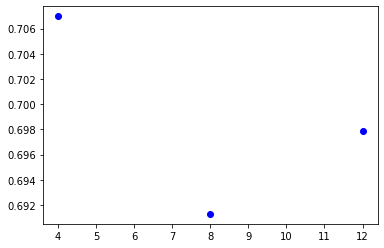

In [23]:
capas = [4,8,12]
plt.scatter(capas,seg_resultados,c = 'b')
plt.plot()

## Primer dataset variando el numero de Neuronas

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)
#model = Sequential()
#model.add(Dense(22,input_shape=(25,), activation = 'relu'))
neuronas = [13,18,40]
resultados_neuronas = []
for j in range(0,len(neuronas)):
    model = Sequential()
    model.add(Dense(22,input_shape=(25,), activation = 'relu'))
    model.add(Dense(neuronas[j],activation = 'relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])
    earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')
    history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])
    loss, acc = model.evaluate(X_test, y_test)
    resultados_neuronas.append((loss,acc))
    clear_session()

Epoch 00022: early stopping
1976/1976 [==============================] - 0s 31us/step
Epoch 00028: early stopping
1976/1976 [==============================] - 0s 29us/step
Epoch 00024: early stopping
1976/1976 [==============================] - 0s 29us/step


In [25]:
tabla2 = pd.DataFrame(resultados_neuronas, index =['13 neuronas', '18 neuronas', '40 neuronas'], columns = ['loss', 'acc'])
tabla2

,loss,acc
13 neuronas,0.551270,0.719636
18 neuronas,0.556732,0.722166
40 neuronas,0.554095,0.711538


[]

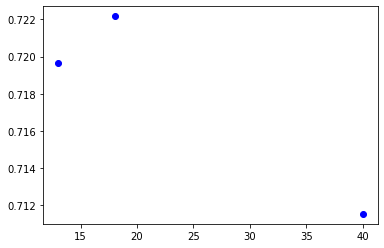

In [26]:
neuronas = [13,18,40]
seg_resultados = [l[1] for l in resultados_neuronas]
plt.scatter(neuronas,seg_resultados,c = 'b')
plt.plot()

## Primer dataset distribuyendo neuronas a traves de las capas

In [27]:
X_train, X_test, y_train, y_test = train_test_split(df1, df2, test_size=0.2)
#model = Sequential()
#model.add(Dense(22,input_shape=(25,), activation = 'relu'))
capas = [1,2,3,4,5,6,7,8,9,10]
resultados_nc = []
neuronas = 14
for j in range(0,len(capas)):
    model = Sequential()
    neuro = neuronas//capas[j]
    model.add(Dense(neuro,input_shape=(25,), activation = 'relu'))
    for i in range(0,capas[j]):
        model.add(Dense(neuro,activation = 'relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.001), metrics = ['accuracy'])
    earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto')
    history = model.fit(X_train, y_train, epochs = 2000, validation_split = 0.15, verbose = 0, 
                    callbacks = [earlystopper])
    loss, acc = model.evaluate(X_test, y_test)
    resultados_nc.append((loss,acc))
    clear_session()

Epoch 00023: early stopping
1976/1976 [==============================] - 0s 28us/step
Epoch 00036: early stopping
1976/1976 [==============================] - 0s 29us/step
Epoch 00046: early stopping
1976/1976 [==============================] - 0s 29us/step
Epoch 00016: early stopping
1976/1976 [==============================] - 0s 32us/step
Epoch 00110: early stopping
1976/1976 [==============================] - 0s 31us/step
Epoch 00104: early stopping
1976/1976 [==============================] - 0s 33us/step
Epoch 00016: early stopping
1976/1976 [==============================] - 0s 33us/step
Epoch 00016: early stopping
1976/1976 [==============================] - 0s 31us/step
Epoch 00016: early stopping
1976/1976 [==============================] - 0s 33us/step
Epoch 00016: early stopping
1976/1976 [==============================] - 0s 33us/step


In [28]:
resultados_nc = [l[1] for l in resultados_nc]

[]

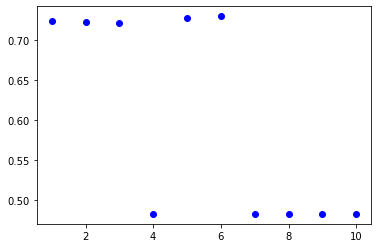

In [29]:
plt.scatter(capas,resultados_nc,c = 'b')
plt.plot()

## Segundo Dataset real

El segundo dataset a usar es <b>"[Kickstarter Projects](https://www.kaggle.com/kemical/kickstarter-projects)"</b> de kaggle, en el cuál se busca predecir el éxito o fracaso de un proyecto

In [4]:
data = pd.read_csv('ks.csv',
                 parse_dates=['deadline', 'launched'])

data.drop('ID', axis = 1, inplace = True)
data.drop('goal', axis = 1, inplace = True)
data.drop('pledged', axis = 1, inplace = True)
data.drop('usd pledged', axis = 1, inplace = True)

data['deadline']=pd.to_datetime(data['deadline'], format="%Y/%m/%d").dt.date
data['launched']=pd.to_datetime(data['launched'], format="%Y/%m/%d").dt.date

data['days'] = (data['deadline'] - data['launched']).dt.days
data['launch_year']=pd.to_datetime(data['launched'], format="%Y/%m/%d").dt.year

data["launch_year"]=data['launch_year'].apply(str)

In [5]:
data_for_model = pd.read_csv('ks.csv')

#Datetime Processing
data_for_model['deadline']=pd.to_datetime(data_for_model['deadline'], format="%Y/%m/%d")
data_for_model['launched']=pd.to_datetime(data_for_model['launched'], format="%Y/%m/%d")

data_for_model['days'] = (data_for_model['deadline'] - data_for_model['launched']).dt.days
data_for_model['launch_year']=pd.to_datetime(data_for_model['launched'], format="%Y/%m/%d").dt.year
data_for_model.drop(['ID',"name","category","launched","currency","deadline","usd pledged","goal","pledged"], axis = 1, inplace = True)

data_for_model["launch_year"]=data_for_model['launch_year'].apply(str) #it has to be string.

Se formatean datos como fechas, y se sacan columnas redundantes (entregan la misma información que otras columnas) y se ve la correlación entre datos, esto para ver como se relacionan las caracteristicas de entrada. 

In [6]:
data_for_model.corr()

,backers,usd_pledged_real,usd_goal_real,days
backers,1.000000,0.752539,0.004517,-0.000792
usd_pledged_real,0.752539,1.000000,0.005596,0.000946
usd_goal_real,0.004517,0.005596,1.000000,0.004184
days,-0.000792,0.000946,0.004184,1.000000


Luego se balancean los datos, dado que los proyectos exitosos son el 30%, los que fallan son el 50% y el resto son otro tipo de categoría.

In [7]:
print("Unbalanced Data shape", len(data))
datafail = data_for_model[data_for_model.state == "failed"]
datasuccess = data_for_model[data_for_model.state == "successful"]
data_for_model = pd.concat([datafail.sample(len(datasuccess), random_state=5), datasuccess])
print("Balanced data shape:", len(data_for_model))
data_for_model.state.value_counts()

Unbalanced Data shape 378661
Balanced data shape: 267912


successful    133956
failed        133956
Name: state, dtype: int64

In [33]:
def state_process(cell_value):
    if cell_value == 'successful':
        return 1
    else:
        return 0    
data_for_model.state = data_for_model.state.apply(state_process)
data_for_model.head()

,main_category,state,backers,country,usd_pledged_real,usd_goal_real,days,launch_year
284067,Publishing,0,13,SE,312.18,860.15,39,2017
281299,Film & Video,0,1,US,10.00,100000.00,29,2015
6785,Music,0,2,US,550.00,4000.00,29,2012
220548,Design,0,1,US,200.00,2750.00,29,2013
301405,Games,0,5,MX,47.69,4841.44,44,2016


Por último se realiza un One-Hot Encoding para poder procesar las carácteristicas no numéricas o temporales.

In [34]:
print('Original Features:\n', list(data.columns), '\n')
data_for_model= pd.get_dummies(data_for_model)
print('Features after One-Hot Encoding:\n', list(data_for_model.columns))
data_for_model.shape

Original Features:
 ['name', 'category', 'main_category', 'currency', 'deadline', 'launched', 'state', 'backers', 'country', 'usd_pledged_real', 'usd_goal_real', 'days', 'launch_year'] 

Features after One-Hot Encoding:
 ['state', 'backers', 'usd_pledged_real', 'usd_goal_real', 'days', 'main_category_Art', 'main_category_Comics', 'main_category_Crafts', 'main_category_Dance', 'main_category_Design', 'main_category_Fashion', 'main_category_Film & Video', 'main_category_Food', 'main_category_Games', 'main_category_Journalism', 'main_category_Music', 'main_category_Photography', 'main_category_Publishing', 'main_category_Technology', 'main_category_Theater', 'country_AT', 'country_AU', 'country_BE', 'country_CA', 'country_CH', 'country_DE', 'country_DK', 'country_ES', 'country_FR', 'country_GB', 'country_HK', 'country_IE', 'country_IT', 'country_JP', 'country_LU', 'country_MX', 'country_N,0"', 'country_NL', 'country_NO', 'country_NZ', 'country_SE', 'country_SG', 'country_US', 'launch_year

(267912, 52)

El trabajo anterior se justifica para disminuir el error sistemático de la experimentación, ya que se podrían hacer otras inferencias por resultados atribuibles a la data de entrada.

In [35]:
def ANN_regresion_nN(X, y, input_dim, neurons=2, layers=1, activation='relu', epochs=10, batch_size=100, verbose=2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    scaler = MinMaxScaler((-1,1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = Sequential()
    neurons = int(np.round(neurons/layers)) if neurons > 1 else 1
    model.add(Dense(units=neurons, input_dim=input_dim, activation='relu'))
    for i in range(layers-1):
        model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    y_pred = model.predict(X_test, batch_size = batch_size)
    y_pred = (y_pred > 0.5)
    del model
    return y_pred, y_test

def ANN_regresion_nlayer(X, y, input_dim, layers, neurons=2 , activation='relu', epochs=10, batch_size=100, verbose=2):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
    
    scaler = MinMaxScaler((-1,1))
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = Sequential()
    model.add(Dense(units=neurons, input_dim=input_dim, activation='relu'))
    for i in range(layers-1):
        model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=verbose)
    
    y_pred = model.predict(X_test, batch_size = batch_size)
    y_pred = (y_pred > 0.5)
    del model
    return y_pred, y_test

In [36]:
from sklearn import metrics

X = data_for_model.iloc[:,data_for_model.columns != 'state']
y = data_for_model.state

## Segundo dataset variando el numero de Neuronas

In [37]:
y_pred_list_1layer = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(X, y, X.shape[1], layers=1, neurons=i , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_1layer.append(score)

1
Epoch 1/10
214329/214329 [==============================] - 4s 20us/step - loss: 0.3481 - accuracy: 0.8331
Epoch 2/10
214329/214329 [==============================] - 4s 20us/step - loss: 0.0598 - accuracy: 0.9979
Epoch 3/10
214329/214329 [==============================] - 4s 20us/step - loss: 0.0268 - accuracy: 0.9980
Epoch 4/10
214329/214329 [==============================] - 5s 22us/step - loss: 0.0177 - accuracy: 0.9976
Epoch 5/10
214329/214329 [==============================] - 5s 22us/step - loss: 0.0130 - accuracy: 0.9981
Epoch 6/10
214329/214329 [==============================] - 5s 22us/step - loss: 0.0077 - accuracy: 0.9989
Epoch 7/10
214329/214329 [==============================] - 4s 21us/step - loss: 0.0108 - accuracy: 0.9984
Epoch 8/10
214329/214329 [==============================] - 4s 21us/step - loss: 0.0079 - accuracy: 0.9989
Epoch 9/10
214329/214329 [==============================] - 4s 21us/step - loss: 0.0098 - accuracy: 0.9987
Epoch 10/10
214329/214329 [========

## Segundo dataset distribuyendo neuronas a traves de las capas

In [38]:
y_pred_list_nNeuron = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nN(X, y, X.shape[1], layers=i, neurons=10 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nNeuron.append(score)

1
Epoch 1/10
214329/214329 [==============================] - 5s 25us/step - loss: 143.4821 - accuracy: 0.9728
Epoch 2/10
214329/214329 [==============================] - 6s 26us/step - loss: 0.0218 - accuracy: 0.9987
Epoch 3/10
214329/214329 [==============================] - 5s 26us/step - loss: 0.0259 - accuracy: 0.9988
Epoch 4/10
214329/214329 [==============================] - 5s 25us/step - loss: 0.0230 - accuracy: 0.9992
Epoch 5/10
214329/214329 [==============================] - 5s 23us/step - loss: 0.0431 - accuracy: 0.9988
Epoch 6/10
214329/214329 [==============================] - 5s 22us/step - loss: 0.0241 - accuracy: 0.9989
Epoch 7/10
214329/214329 [==============================] - 5s 23us/step - loss: 0.0523 - accuracy: 0.9989
Epoch 8/10
214329/214329 [==============================] - 6s 26us/step - loss: 0.0297 - accuracy: 0.9991
Epoch 9/10
214329/214329 [==============================] - 6s 26us/step - loss: 0.0842 - accuracy: 0.9987
Epoch 10/10
214329/214329 [======

## Segundo dataset variando el numero de capas

In [39]:
y_pred_list_nlayer = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(X, y, X.shape[1], layers=i, neurons=10 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nlayer.append(score)

1
Epoch 1/10
214329/214329 [==============================] - 5s 23us/step - loss: 7.0931 - accuracy: 0.9899
Epoch 2/10
214329/214329 [==============================] - 5s 23us/step - loss: 0.0720 - accuracy: 0.9990
Epoch 3/10
214329/214329 [==============================] - 5s 25us/step - loss: 0.0450 - accuracy: 0.9993
Epoch 4/10
214329/214329 [==============================] - 5s 26us/step - loss: 0.0925 - accuracy: 0.9991
Epoch 5/10
214329/214329 [==============================] - 5s 25us/step - loss: 0.0475 - accuracy: 0.9994
Epoch 6/10
214329/214329 [==============================] - 5s 25us/step - loss: 0.0818 - accuracy: 0.9994
Epoch 7/10
214329/214329 [==============================] - 5s 23us/step - loss: 0.0562 - accuracy: 0.9994
Epoch 8/10
214329/214329 [==============================] - 5s 25us/step - loss: 0.1089 - accuracy: 0.9992
Epoch 9/10
214329/214329 [==============================] - 6s 26us/step - loss: 0.0827 - accuracy: 0.9992
Epoch 10/10
214329/214329 [========

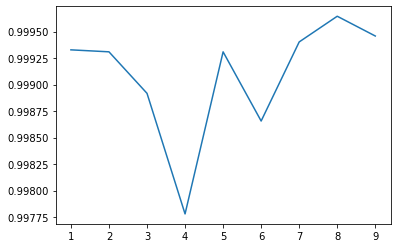

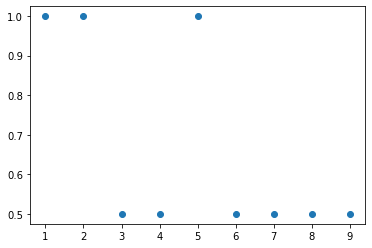

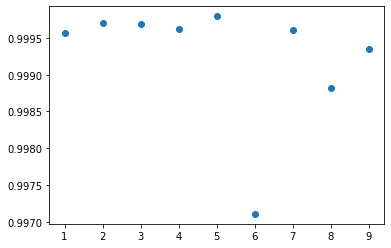

In [40]:
# Plot functions y_pred_list_1layer
plt.plot(range(1,10), y_pred_list_1layer)
plt.show()
# Plot functions y_pred_list_nNeuron
plt.plot(range(1,10), y_pred_list_nNeuron)
plt.show()
# Plot functions
plt.plot(range(1,10), y_pred_list_nlayer)
plt.show()

El primer gráfico es <b>variando el numero de Neuronas</b> y dejando una capa, podemos notar que el problema es linealmente separable, dado que se aprende en la primera iteración, pero podemos notar que al aumentar el número de neuronas es variable si se aprende 'bien' o 'muy bien'.

El segundo gráfico es <b>distribuyendo las neuronas a través de las capas</b>, la forma de distribución es de 10/capa_actual, dónde se aprecia que al aumentar las capas (con menos neuronas en cada iteración en cada una de ellas) la red tiende a no poder aprender el problema, exceptuando el caso de 5 capas y dos neuronas.

El tercer gráfico es <b>variando el numero de capas</b> y con 10 neuronas fijas en cada una de ellas, en todos los casos se logra aprender el modelo.

## Segundo dataset sin One-hot encoding ni balanceo

In [41]:
data = pd.read_csv('ks.csv',
                 parse_dates=['deadline', 'launched'])

data.drop('ID', axis = 1, inplace = True)
data.drop('goal', axis = 1, inplace = True)
data.drop('pledged', axis = 1, inplace = True)
data.drop('usd pledged', axis = 1, inplace = True)

data['deadline']=pd.to_datetime(data['deadline'], format="%Y/%m/%d").dt.date
data['launched']=pd.to_datetime(data['launched'], format="%Y/%m/%d").dt.date

data['days'] = (data['deadline'] - data['launched']).dt.days
data['launch_year']=pd.to_datetime(data['launched'], format="%Y/%m/%d").dt.year

data["launch_year"]=data['launch_year'].apply(str)

data_for_model = pd.read_csv('ks.csv')

#Datetime Processing
data_for_model['deadline']=pd.to_datetime(data_for_model['deadline'], format="%Y/%m/%d")
data_for_model['launched']=pd.to_datetime(data_for_model['launched'], format="%Y/%m/%d")

data_for_model['days'] = (data_for_model['deadline'] - data_for_model['launched']).dt.days
data_for_model['launch_year']=pd.to_datetime(data_for_model['launched'], format="%Y/%m/%d").dt.year
data_for_model.drop(['ID',"name","category","launched","currency","deadline","usd pledged","pledged", "country", "main_category"], axis = 1, inplace = True)

data_for_model["launch_year"]=data_for_model['launch_year'].apply(str) #it has to be string.

In [42]:
# print("Unbalanced Data shape", len(data))
# datafail = data_for_model[data_for_model.state == "failed"]
# datasuccess = data_for_model[data_for_model.state == "successful"]
# data_for_model = pd.concat([datafail.sample(len(datasuccess), random_state=5), datasuccess])
# print("Balanced data shape:", len(data))
# data_for_model.state.value_counts()

def state_process(cell_value):
    if cell_value == 'successful':
        return 1
    else:
        return 0    
data_for_model.state = data_for_model.state.apply(state_process)

data_for_model.head()

,goal,state,backers,usd_pledged_real,usd_goal_real,days,launch_year
0,1000.0,0,0,0.0,1533.95,58,2015
1,30000.0,0,15,2421.0,30000.00,59,2017
2,45000.0,0,3,220.0,45000.00,44,2013
3,5000.0,0,1,1.0,5000.00,29,2012
4,19500.0,0,14,1283.0,19500.00,55,2015


In [43]:
from sklearn import metrics

X = data_for_model.iloc[:,data_for_model.columns != 'state']
y = data_for_model.state

In [44]:
y_pred_list_1layer2 = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(X, y, X.shape[1], layers=1, neurons=i , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_1layer2.append(score)

1
Epoch 1/10
302928/302928 [==============================] - 7s 23us/step - loss: 8077.0049 - accuracy: 0.4502
Epoch 2/10
302928/302928 [==============================] - 7s 22us/step - loss: 0.6532 - accuracy: 0.6461
Epoch 3/10
302928/302928 [==============================] - 7s 22us/step - loss: 0.6498 - accuracy: 0.6461
Epoch 4/10
302928/302928 [==============================] - 7s 23us/step - loss: 0.6498 - accuracy: 0.6461
Epoch 5/10
302928/302928 [==============================] - 7s 23us/step - loss: 0.6498 - accuracy: 0.6461
Epoch 6/10
302928/302928 [==============================] - 7s 22us/step - loss: 0.6498 - accuracy: 0.6461
Epoch 7/10
302928/302928 [==============================] - 7s 23us/step - loss: 0.6498 - accuracy: 0.6461
Epoch 8/10
302928/302928 [==============================] - 6s 21us/step - loss: 0.6498 - accuracy: 0.6461
Epoch 9/10
302928/302928 [==============================] - 6s 21us/step - loss: 0.6498 - accuracy: 0.6461
Epoch 10/10
302928/302928 [=====

In [45]:
y_pred_list_nNeuron2 = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nN(X, y, X.shape[1], layers=i, neurons=14 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nNeuron2.append(score)

1
Epoch 1/10
302928/302928 [==============================] - 7s 23us/step - loss: 155.3194 - accuracy: 0.9471
Epoch 2/10
302928/302928 [==============================] - 7s 23us/step - loss: 4.9773 - accuracy: 0.9747
Epoch 3/10
302928/302928 [==============================] - 7s 22us/step - loss: 7.8818 - accuracy: 0.9748
Epoch 4/10
302928/302928 [==============================] - 7s 22us/step - loss: 7.3749 - accuracy: 0.9731
Epoch 5/10
302928/302928 [==============================] - 7s 24us/step - loss: 3.4549 - accuracy: 0.9760
Epoch 6/10
302928/302928 [==============================] - 7s 23us/step - loss: 4.8524 - accuracy: 0.9760
Epoch 7/10
302928/302928 [==============================] - 7s 23us/step - loss: 3.8561 - accuracy: 0.9784
Epoch 8/10
302928/302928 [==============================] - 7s 22us/step - loss: 4.9003 - accuracy: 0.9770
Epoch 9/10
302928/302928 [==============================] - 7s 22us/step - loss: 4.7201 - accuracy: 0.9781
Epoch 10/10
302928/302928 [======

In [46]:
y_pred_list_nlayer2 = []
for i in range(1,10):
    print(i)
    y_predict, y_test = ANN_regresion_nlayer(X, y, X.shape[1], layers=i, neurons=14 , activation='relu', epochs=10, batch_size=100, verbose=1)
    score = metrics.roc_auc_score(y_test, y_predict)
    
    print(f'score: {score*100}%')
    y_pred_list_nlayer2.append(score)

1
Epoch 1/10
302928/302928 [==============================] - 7s 24us/step - loss: 65.5473 - accuracy: 0.9541
Epoch 2/10
302928/302928 [==============================] - 7s 24us/step - loss: 2.7886 - accuracy: 0.9764
Epoch 3/10
302928/302928 [==============================] - 7s 24us/step - loss: 1.8034 - accuracy: 0.9783
Epoch 4/10
302928/302928 [==============================] - 7s 24us/step - loss: 1.5473 - accuracy: 0.9795
Epoch 5/10
302928/302928 [==============================] - 7s 24us/step - loss: 1.3903 - accuracy: 0.9795
Epoch 6/10
302928/302928 [==============================] - 7s 24us/step - loss: 2.1541 - accuracy: 0.9804
Epoch 7/10
302928/302928 [==============================] - 7s 24us/step - loss: 1.3430 - accuracy: 0.9808
Epoch 8/10
302928/302928 [==============================] - 7s 24us/step - loss: 2.1771 - accuracy: 0.9804
Epoch 9/10
302928/302928 [==============================] - 7s 24us/step - loss: 1.2776 - accuracy: 0.9820
Epoch 10/10
302928/302928 [=======

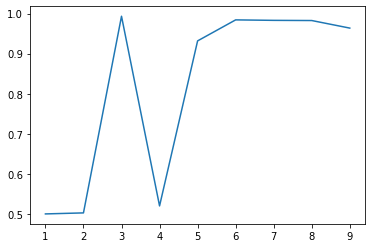

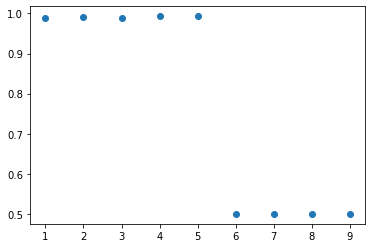

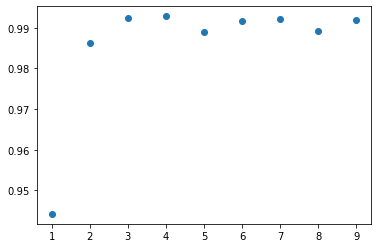

In [47]:
# Plot functions y_pred_list_1layer
plt.plot(range(1,10), y_pred_list_1layer2)
plt.show()
# Plot functions y_pred_list_nNeuron
plt.plot(range(1,10), y_pred_list_nNeuron2)
plt.show()
# Plot functions
plt.plot(range(1,10), y_pred_list_nlayer2)
plt.show()
# print(f'Mean Squared Error{mean_squared_error(y_d, y_d_hat)}')

En este último ejemplo se aprecia que para el modelo de <b>variación en el numero de neuronas</b> (gráfico 1) ya no se puede aprender el problema en todos los casos, si no que se necesitan tres neuronas y una capa para recién lograr obtener un buen aprendizaje.

En el segundo caso de <b>distribuir las neuronas a través de las capas</b>, el patrón de aprender hasta cierto número de capas se mantiene.

Por último para el tercer gráfico (<b>variando el numero de capas</b>) se mantiene un buen aprendizaje.